In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
import imgaug.augmenters as iaa
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = "/home/liorr/Mask_RCNN/mrcnn"

# Import Mask RCNN
sys.path.append(ROOT_DIR)
import utils
import visualize
from visualize import display_images
import model as modellib
from model import log

import aeolian

%matplotlib inline 
%reload_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
config = aeolian.AeolianConfig()
AEOLIAN_DIR = os.path.join(ROOT_DIR, "aeolian_dataset/dataset")

## Dataset

In [4]:
# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
dataset = aeolian.AeolianDataset(AEOLIAN_DIR)
aeolian.prepare_dirs(AEOLIAN_DIR, is_remove_old_annotation = False)
dataset.load_aeolian(AEOLIAN_DIR, "train", use_labelbox = False, download_data = False)

# Must call before using the dataset
dataset.prepare()

print("Training images Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Training images Count: 853
Class Count: 3
  0. BG                                                
  1. barchan_dune                                      
  2. TAR                                               


## Optional: download training and validation data

In [23]:
if False: # First remove the safety...
    dataset.load_aeolian(AEOLIAN_DIR, "train", use_labelbox = False, download_data = True)
else:
    pass

Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcjiv5g55di50ybcde8y6j0d.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki7yerlz00113g68u4sx0fk9.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki58gjmy00003g68hsr3d26k.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcjvfoey04jn0ybch7tr0nb4.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcy524bw000s3a60sh60mha2.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckdae71z500003b5sw9fc7xam.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcigbc4000du0y8thgpy6si5.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckd2e4v4y00023a60mg4bu4qe.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckci2fqj934nc0y9bcuyr8ouf.jpg
Saving image to fil

Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcgkmmk70fsq0y510zjscgzn.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcflzfvv06l90y769tmn1rvz.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcqmb6a2002s3b60jkuyq34u.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcqlb1ii00263b60s1zpyf4z.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcmmb6h4464x0yad4wzd2a24.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki6nri4c000p3g68jtrup4j2.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcici5pd3lp90ybc53h59pmk.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcwczyxm001o3b60yyyvzffl.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckco2ow7100v90y55hb4m32s2.jpg
Saving image to fil

Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki7qnglg00083g6891rgmgwu.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki6nui5c00123g68jdjn2jsb.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcp6kbgt000r3b605we0pmal.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcs5oqja000y3b609mv2zj7u.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki80onft008g3g68wt1ohxdp.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckd25blut000t3a60mp2h8tp2.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcuok005001d3b607ymud4ni.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki7xo83h006c3g68bv3qg2k4.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckd3kf75r00023a60om5q6wdy.jpg
Saving image to fil

Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckdg7zy7k00003b5s2ww1dt2d.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcqmnvib000i3b60ng1k5koe.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki6bt94g003u3g68n9kecitu.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcj6wnpv00km0yaf6sc6dq9j.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki5hvxn0000h3g68e88d8nl3.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcxobs7o00183a60h8szp666.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcqmoai1000o3b60byd02zth.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcjj7mg35e0w0ybcbmey1o1n.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckctjunuh00013b60ci9dfaqj.jpg
Saving image to fil

Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckd3vfxc500013a60mldek8rw.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcidqvpj3odt0ya92hfbckfq.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcy4rv3s000l3a60b2eolpa7.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcy5nfxw001l3a60hmck70zv.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcgc8gl139m40z7leygycigp.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcyzwl45002b3g600h5akdw1.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcv9osuh001s3g60mwgfzon8.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckco4ovrm05xe0y55g1ta3s4j.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki66topz001c3g68fvgiz4i9.jpg
Saving image to fil

Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckctuuqg4004g3b60j9gu0j9d.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcsdr1vo001h3b600jtzf93n.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki7r3qlg00183g68ad0m55ql.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcg8spuf33e90y7jcq545kyt.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcpcy6nl00053h60zv1i9sng.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcs20b16000e3b60bpj6suj1.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcs6080k001m3b601fxn9q0q.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcz7kjc9000z3a604060na9f.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckchy8m7y31h80ybc4i7d40eh.jpg
Saving image to fil

Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcxs0f9e000b3a607in1orax.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckctaa77m000k3b60gdvz3x8f.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckctae8jm000r3b60p2lc924y.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckchx42jo2zji0y9bhtu3h099.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcjtvdwu00r70yav261h4kvz.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcjj7z8m5cls0y9bban0bleg.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki6y367t000z3g68gky8fmr4.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcm2xdx42kev0ya39zwody5f.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcz8v33400073a60owpsxm6x.jpg
Saving image to fil

Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki80288j005l3g68fup3i1yh.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcflixtk05ir0y7mf1o7egyf.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcsdd523000h3b605iyvrgil.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcwojzn6000j3a60qdsni3lh.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcxpijq6001k3g60g7ed88ae.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki7qkf2j00343g68qmisxdjc.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki81kx3q007p3g68xtt258fb.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcwcdbey000z3b605r04i4bv.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckctt7uhz00083b60etesv9zo.jpg
Saving image to fil

Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki7zmkei00433g684irgzlse.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckf0c83ew00013h5rnq2u7zdb.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcnjds2k323h0yadbpy6gs80.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcfhtqly00010y7jfbmr3xrj.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki57iere00033g68wpe14fe1.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcuo8gpi00123b60jeoik3sc.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckci6tspi3bkm0ybceaer2pj0.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcwolaz0000p3a600iq03rqv.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki7qnvtx00093g687voo1bc2.jpg
Saving image to fil

Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcyzyvds000a3g608m5whr61.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcj8c0w551pd0y9b7zwj54fa.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckctaetpl00123b60excspwu0.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcfjscsj02gc0y7memrzc8t5.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcxs0jub000c3a60czpqbs0j.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcph149m000f3b608zycxoa9.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcy53oj000143a60b2sk2a3r.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcqefsvq001f3b60n3laklee.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckd24tqmc00033a60pba1rwld.jpg
Saving image to fil

Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcxmpjzk001j3g60svyl9rdm.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcigm8vd3tf90ya94t7w1nba.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcjva8w502xh0yav4nxlar17.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcs5uadl00163b60re742ejp.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcus5kok001s3b60j8ka0iv7.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcg9rcpi353f0z7lhwry2uts.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcgj9kb80c990y6uhk0q3bue.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcfksues04bm0y761sho2myj.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcfhtpjs4s640z7dalw753xa.jpg
Saving image to fil

Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcifykhl3qhc0y9b8qs22glb.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcgaq6aq36o50y7m5sbeb1hr.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckd251glc000p3a60do7aegm6.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcxo9wrc000j3a60vw6ku8pq.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcj84w3n51ac0y9b9xkrciqd.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcxn99xg00043a60r5rgfwr6.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcxqw7k2001q3a6009cske2y.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckco1n4sb08v00y3iae240oe7.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcz7eflx00083a60rr28epk3.jpg
Saving image to fil

In [4]:
if False: # First remove the safety...
    dataset.load_aeolian(AEOLIAN_DIR, "val", use_labelbox = False, download_data = True)
else:
    pass

In [ ]:
if True: # First remove the safety...
    dataset.load_aeolian(AEOLIAN_DIR, "test", use_labelbox = False, download_data = True)
else:
    pass

Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/test/ckscw1ru0f2p50yaldc2td5b0.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/test/ckscw1s1hf2p60yalawhxerss.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/test/ckscwbesmf36p0yal0ioh4m3b.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/test/ckscwljv5f8bi0yav97vmgkkk.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/test/ckscwpj63f8kq0yav2y6l2tcr.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/test/ckscwr8xpf46v0yal1xv59kp8.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/test/ckscwvvmsf8xs0yav4yo57m5o.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/test/ckscwvz3qf49n0ybmcqya86a5.jpg
Saving image to file /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/test/ckscwy5stf4db0ybmf13jb523.jpg


In [92]:
np.size(annotation_dataframe)

115452

In [19]:
import pandas as pd
idx_list = list()

annotation_dataframe = pd.read_json(os.path.join("dataset", "annotations.json"))

for i, row in enumerate(annotation_dataframe['Created At']):
    created_date = row[:10]
    created_yr = created_date[:4]
    created_mo = created_date[5:7]
    
    if (int(created_yr) == 2021) and (int(created_mo) > 7):
        if annotation_dataframe['Skipped'][i] == False:
            idx_list.append(i)

annotation_dataframe.iloc[idx_list].transpose().to_json(os.path.join('dataset', 'test', 'annotations.json'))

In [17]:
annotation_dataframe.iloc[idx_list].transpose().to_json(os.path.join(dataset_dir, 'test', 'annotations.json'))

ID                 DataRow ID  \
1077  ckscw1ru0f2p50yaldc2td5b0  ckcfdysnv2mkw0ao8c7zi5cmw   
1078  ckscw1s1hf2p60yalawhxerss  ckcfdyst02vhk0ao81gm3h39v   
1079  ckscwbesmf36p0yal0ioh4m3b  ckcfdysnz2ms00ao837vqfpib   
1080  ckscwljv5f8bi0yav97vmgkkk  ckcfdyssu2v300ao82di9f14h   
1081  ckscwpj63f8kq0yav2y6l2tcr  ckcfdyso52n2o0ao87p8md425   
1082  ckscwr8xpf46v0yal1xv59kp8  ckcfdysnq2mdg0ao8fc2ma6d1   
1083  ckscwvvmsf8xs0yav4yo57m5o  ckcfdyso72n680ao8gvwn04qd   
1084  ckscwvz3qf49n0ybmcqya86a5  ckcfdystl2w2w0ao86bh2hfyk   
1085  ckscwy5stf4db0ybmf13jb523  ckcfdysns2mh00ao8970nhbip   
1086  ckscx63bff9pn0yav5pe1hykk  ckcfdysmm2khw0ao862wlc0uq   
1087  ckscxb4kdf5e40ybmevf2fi5t  ckcfdysts2wko0ao8h1b415oi   
1088  ckscxiicmf6et0yalc7m5gwqq  ckcfdystu2wo80ao8dphm7dkc   
1089  ckscxixopf6gp0yal2bnwasq3  ckcfdysr12rfg0ao87nuk56nn   
1090  ckscxjndxfapl0yav14fs5u4b  ckcfdysmt2kw40ao8hnl97rnc   
1091  ckscxnx1yfb0o0yavf3x55p3u  ckcfdysx532b80ao8g08b8uu3   
1092  ckscxsf8efbei0yavegko7mt9  ckcfdysw030500ao806hifguf   
1093  ckscxwdpef7di0yal03mq2tar  ckcfdysx932ic0ao8586d2k8r   
1094  ckscxxst5f7hb0yal4cqk2jlh  ckcfdysw630j80ao8csnf6kur   
1095  ckscy10m7f7oe0yal4nit4q72  ckcfdysnv2ml80ao8br26ejgw   
1096  cksde6cjgg4ba0ybmgrxkgjs8  ckcfdysnz2msc0ao83n1k59u4   
1097  cksdejgu7g7fw0yalexkg5ajo  ckcfdyssu2v3c0ao880k3ae0j   
1098  cksdelgsrg7iv0yaldjw4gz5y  ckcfdyssw2v6w0ao89wwj5hsm   
1099  cksdeli99g55x0ybm7aytdisu  ckcfdysnp2ma80ao884478xby   
1100  cksdf0rkmg83w0yal4tav9pp0  ckcfdysmm2ki80ao80a4q1p0k   
1101  cksdfif21g65k0ybm9jphc4yq  ckcfdyswv31ts0ao8hnqvgb7v   
1102  cksdfkay6g8pf0yal9u329qmk  ckcfdysvh2yyc0ao8ex8p153j   
1103  cksdfosadg8uv0yal5zqifaqu  ckcfdystu2wok0ao8078ugofm   
1104  cksdfq326g8z30yal079reve7  ckcfdysvn2z900ao8flvs7rsq   
1105  cksdfrlkagbt80yavglo23ubf  ckcfdysmx2l3k0ao88yoh9te0   
1106  cksdft7ljgbwd0yavfeth7krw  ckcfdysr52rqg0ao8glrx1vp7   
1107  cksdfugcegbyi0yav3343afpk  ckcfdysw0305c0ao89k3111lf   
1108  cksdg1v0lg9q30yal0noae67a  ckcfdysu52x6c0ao88zy3aq5n   
1109  cksdg2npggc8y0yav4i081p2c  ckcfdysse2u7c0ao805u73vsl   
1110  cksdg4q6ug7460ybmdjvb88pp  ckcfdysvr2zjo0ao82l1nd7pc   
1111  cksdg5d9ng9ur0yal5zx0cqty  ckcfdysn42le80ao8eso48qkn   
1112  cksdg8bk2g9zq0yal3qp377gn  ckcfdysw430g00ao874p43vct   
1113  cksdgpg1ygao50yal1d6c8p99  ckcfdysw630jk0ao8cknj60wx   
1114  cksdgttdpg87i0ybm9wr8gfs3  ckcfdysnv2mlk0ao8gv0eboa8   
1115  cksdguyykg89e0ybm7x6ghaxy  ckcfdyssp2ut00ao81ei4782t   
1116  cksdgxvzygb5s0yal1kw2c9yw  ckcfdysnn2m700ao88a5k4nno   
1117  ckse2x4hf07g60yc2d7snd94x  ckcfdysnp2mak0ao890dccza2   
1118  ckse32ophi6ry0yavf8d61dp6  ckcfdysnr2me40ao8dhrphlvb   
1119  ckse3fh8fi47y0yal8kr22j90  ckcfdysuu2ydc0ao84ou67x49   
1120  ckse3gj88i2oc0ybmh8aebpp2  ckcfdystl2w3k0ao82g9q6sjz   
1121  ckse3k3yi09zb0yc23c121sbx  ckcfdyswn31jg0ao8aoxo2thd   
1122  ckse9m97pix340yav08h2e5hr  ckcfdysmm2kik0ao8bv2x4i44   
1123  ckse9z5en0zzi0yc20x3chdi8  ckcfdysqe2qg80ao82m51e2az   
1124  cksea2bsd0nej0z5j5lbgfcbw  ckcfdysvr2zk00ao8ecg84isw   
1125  cksea8yek0i8p0ya54b0fbrr6  ckcfdysxd32q40ao865rtht7q   
1126  ckseasen90kbc0ya5bcpuc69t  ckcfdysxf32to0ao801oy1cam   

                                           Labeled Data  \
1077  https://storage.labelbox.com/ckce11czyfmmi0735...   
1078  https://storage.labelbox.com/ckce11czyfmmi0735...   
1079  https://storage.labelbox.com/ckce11czyfmmi0735...   
1080  https://storage.labelbox.com/ckce11czyfmmi0735...   
1081  https://storage.labelbox.com/ckce11czyfmmi0735...   
1082  https://storage.labelbox.com/ckce11czyfmmi0735...   
1083  https://storage.labelbox.com/ckce11czyfmmi0735...   
1084  https://storage.labelbox.com/ckce11czyfmmi0735...   
1085  https://storage.labelbox.com/ckce11czyfmmi0735...   
1086  https://storage.labelbox.com/ckce11czyfmmi0735...   
1087  https://storage.labelbox.com/ckce11czyfmmi0735...   
1088  https://storage.labelbox.com/ckce11czyfmmi0735...   
1089  https://storage.labelbox.com/ckce11czyfmmi0735...   
1090  https://storage.labelbox.com/ckce1

## Display Samples
Load and display samples and masks

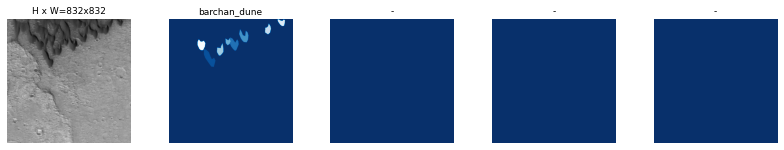

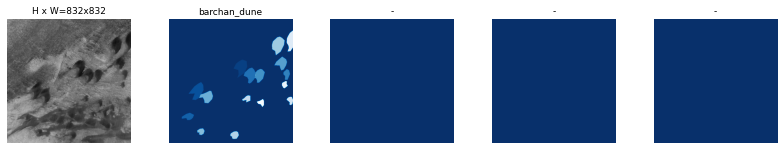

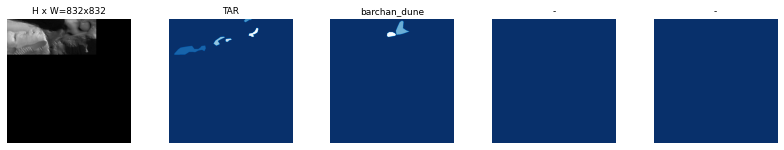

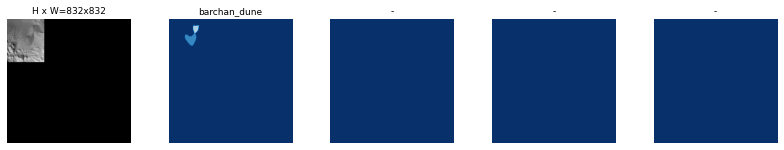

In [5]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id, config)
    mask, class_ids = dataset.load_mask(image_id, config)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## Bounding boxes

Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcz7kjc9000z3a604060na9f.jpg
image_id  387 /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcz7kjc9000z3a604060na9f.jpg
image                    shape: (832, 832, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (832, 832, 2)         min:    0.00000  max:    1.00000  float64
class_ids                shape: (2,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (2, 4)                min:  172.00000  max:  830.00000  int32


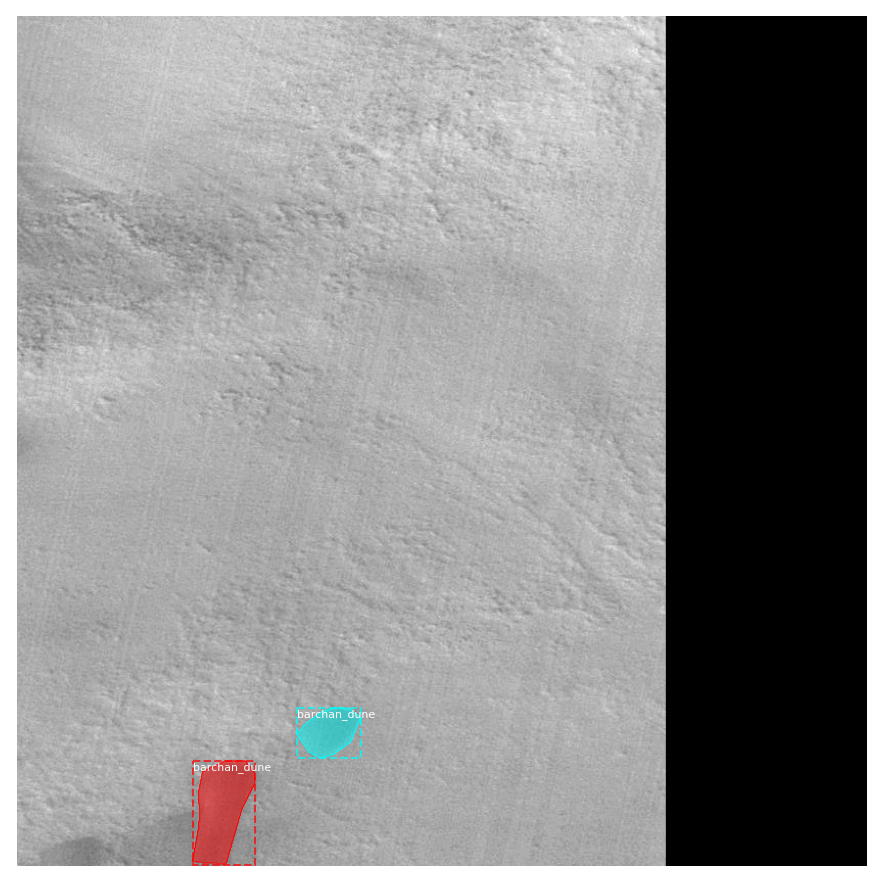

/home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcz7kjc9000z3a604060na9f.jpg


In [27]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id, config)
mask, class_ids = dataset.load_mask(image_id, config)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

print(dataset.image_reference(image_id))

In [28]:
def isgrayscale(img):
    if len(img.shape) < 3:
        return True
    if img.shape[2]  == 1:
        return True
    
    blue, green, red = img[:,:,0], img[:,:,1], img[:,:,2]

    if np.all(blue == green) and np.all(blue == red):
        return True
    return False

isgrayscale(image[:,:,0])

True

## Resize Images
To support multiple images per batch, images are resized to one size (1024x1024). Aspect ratio is preserved, though. If an image is not square, then zero padding is added at the top/bottom or right/left.


Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcqljoa2002j3b60ee5j4xoi.jpg
image_id:  372 /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcqljoa2002j3b60ee5j4xoi.jpg
Original shape:  (832, 832, 3)
image                    shape: (832, 832, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (832, 832, 4)         min:    0.00000  max:    1.00000  float64
class_ids                shape: (4,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (4, 4)                min:   89.00000  max:  810.00000  int32


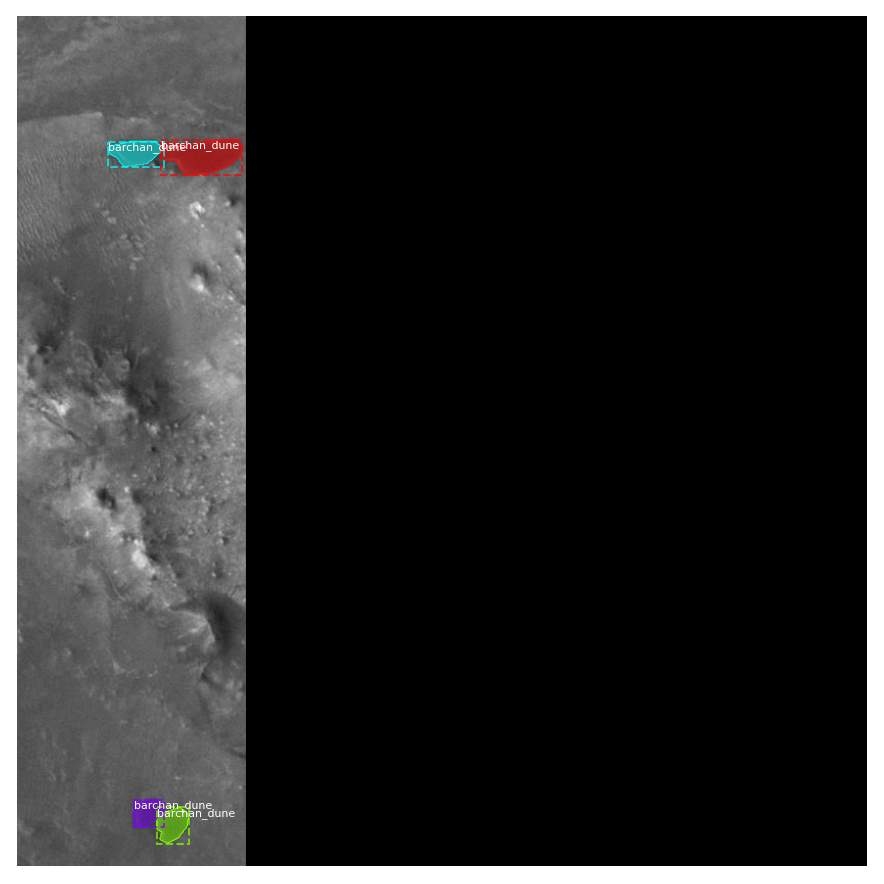

In [29]:
# Load random image and mask.
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id, config)
mask, class_ids = dataset.load_mask(image_id, config)
original_shape = image.shape

# Resize
image, window, scale, padding, crop = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

## Mini Masks
Instance binary masks can get large when training with high resolution images. For example, if training with 1024x1024 image then the mask of a single instance requires 1MB of memory (Numpy uses bytes for boolean values). If an image has 100 instances then that's 100MB for the masks alone.

To improve training speed, we optimize masks by:

We store mask pixels that are inside the object bounding box, rather than a mask of the full image. Most objects are small compared to the image size, so we save space by not storing a lot of zeros around the object.
We resize the mask to a smaller size (e.g. 56x56). For objects that are larger than the selected size we lose a bit of accuracy. But most object annotations are not very accuracy to begin with, so this loss is negligable for most practical purposes. Thie size of the mini_mask can be set in the config class.
To visualize the effect of mask resizing, and to verify the code correctness, we visualize some examples.

image                    shape: (832, 832, 3)         min:    0.00000  max:  254.00000  uint8
image_meta               shape: (15,)                 min:    0.00000  max:  832.00000  int64
class_ids                shape: (5,)                  min:    1.00000  max:    2.00000  int32
bbox                     shape: (5, 4)                min:   30.00000  max:  808.00000  int32
mask                     shape: (832, 832, 5)         min:    0.00000  max:    1.00000  float64


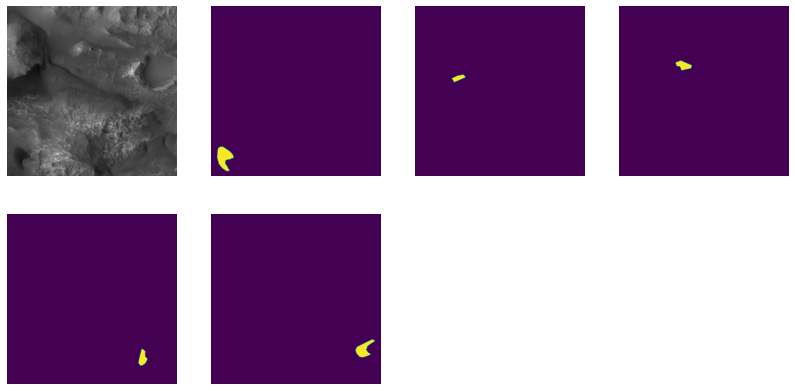

In [5]:
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=False)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])


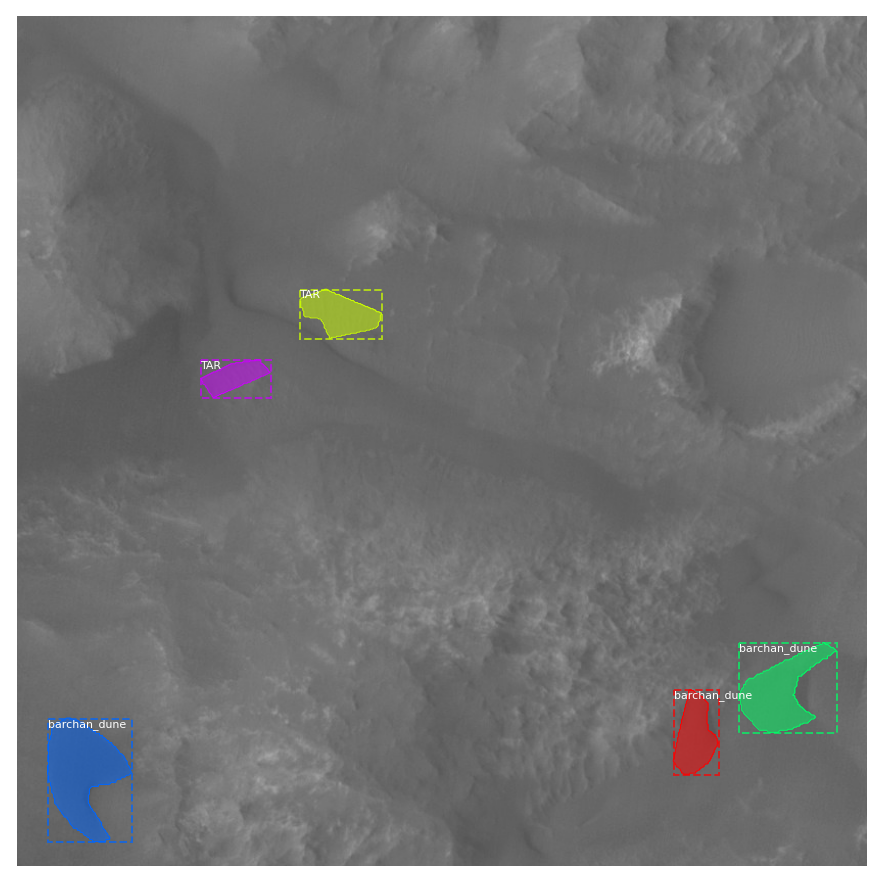

In [23]:
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

mask                     shape: (56, 56, 4)           min:    0.00000  max:    1.00000  bool


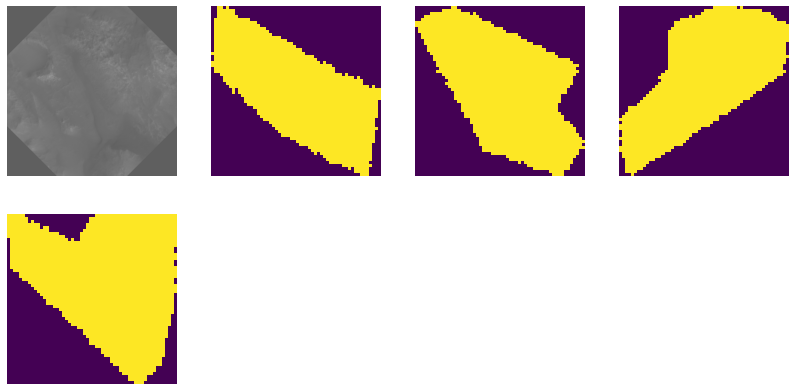

In [55]:
# Add augmentation and mask resizing.

augmentations = iaa.Sequential([
    iaa.Sometimes(0.5, [
        iaa.OneOf( [ 
            iaa.ContrastNormalization((0.1, 0.4)),
            iaa.Invert(p = 1)
        ])
    ]), 
    iaa.Sometimes(0.5, [
        iaa.OneOf( [ 
            imgaug.augmenters.Affine(rotate=45),
            imgaug.augmenters.Affine(rotate=90),
            imgaug.augmenters.Affine(rotate=135),                                    
            imgaug.augmenters.Affine(rotate=180),
            imgaug.augmenters.Affine(rotate=225),                                    
            imgaug.augmenters.Affine(rotate=270),
        ])
    ])    
    ], random_order = True
)

# augmentations = imgaug.augmenters.Sometimes(1,
#                                 imgaug.augmenters.OneOf
#                                 (
#                                 [
#                                 imgaug.augmenters.Affine(rotate=45),
#                                 imgaug.augmenters.Affine(rotate=90),
#                                 imgaug.augmenters.Affine(rotate=135),                                    
#                                 imgaug.augmenters.Affine(rotate=180),
#                                 imgaug.augmenters.Affine(rotate=225),                                    
#                                 imgaug.augmenters.Affine(rotate=270),                                    
#                                 ]
#                             )
#                                 imgaug.augmenters.OneOf
#                                 (
#                                 [
#                                 imgaug.augmenters.Affine(rotate=45),
#                                 imgaug.augmenters.Affine(rotate=90),
#                                 imgaug.augmenters.Affine(rotate=135),                                    
#                                 imgaug.augmenters.Affine(rotate=180),
#                                 imgaug.augmenters.Affine(rotate=225),                                    
#                                 imgaug.augmenters.Affine(rotate=270),                                    
#                                 ]
#                             )
#                         )

image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, augmentation=augmentations, use_mini_mask=True)
log("mask", mask)
display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

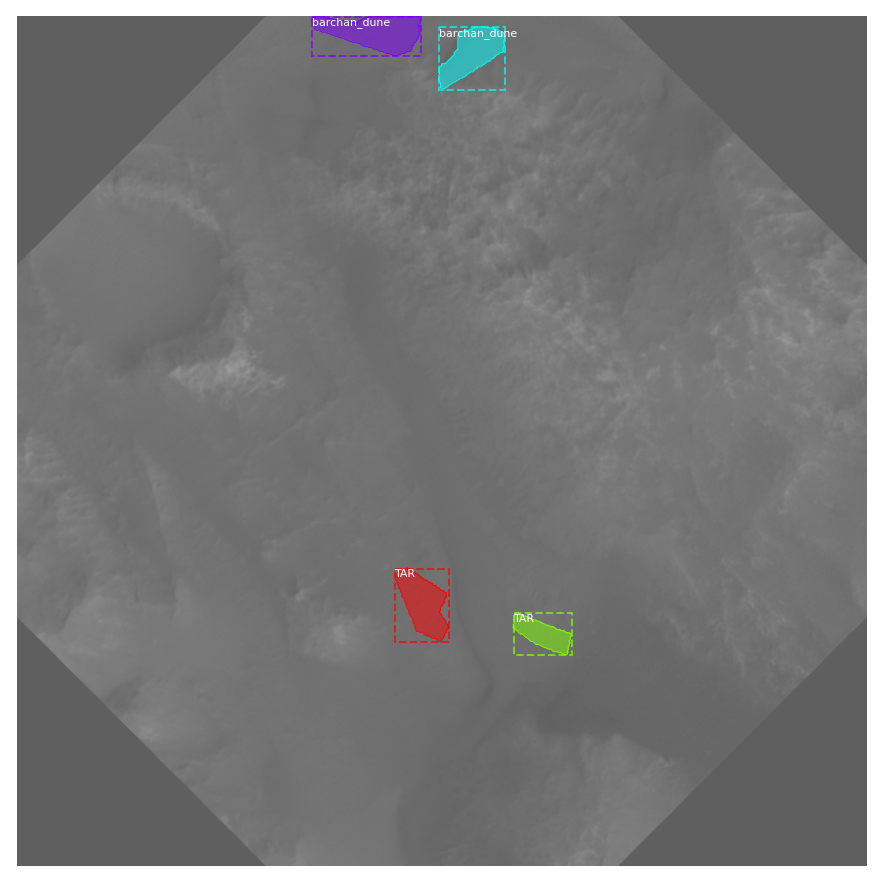

In [56]:
mask = utils.expand_mask(bbox, mask, image.shape)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

## Anchors
The order of anchors is important. Use the same order in training and prediction phases. And it must match the order of the convolution execution.

For an FPN network, the anchors must be ordered in a way that makes it easy to match anchors to the output of the convolution layers that predict anchor scores and shifts.

Sort by pyramid level first. All anchors of the first level, then all of the second and so on. This makes it easier to separate anchors by level.
Within each level, sort anchors by feature map processing sequence. Typically, a convolution layer processes a feature map starting from top-left and moving right row by row.
For each feature map cell, pick any sorting order for the anchors of different ratios. Here we match the order of ratios passed to the function.
Anchor Stride: In the FPN architecture, feature maps at the first few layers are high resolution. For example, if the input image is 1024x1024 then the feature meap of the first layer is 256x256, which generates about 200K anchors (2562563). These anchors are 32x32 pixels and their stride relative to image pixels is 4 pixels, so there is a lot of overlap. We can reduce the load significantly if we generate anchors for every other cell in the feature map. A stride of 2 will cut the number of anchors by 4, for example.

In this implementation we use an anchor stride of 2, which is different from the paper.

In [34]:
# Generate Anchors
config.BACKBONE_SHAPES = modellib.compute_backbone_shapes(config, config.IMAGE_SHAPE)
anchors = utils.generate_pyramid_anchors(config.RPN_ANCHOR_SCALES, 
                                          config.RPN_ANCHOR_RATIOS,
                                          config.BACKBONE_SHAPES,
                                          config.BACKBONE_STRIDES, 
                                          config.RPN_ANCHOR_STRIDE)

# Print summary of anchors
num_levels = len(config.BACKBONE_SHAPES)
anchors_per_cell = len(config.RPN_ANCHOR_RATIOS)
print("Count: ", anchors.shape[0])
print("Scales: ", config.RPN_ANCHOR_SCALES)
print("ratios: ", config.RPN_ANCHOR_RATIOS)
print("Anchors per Cell: ", anchors_per_cell)
print("Levels: ", num_levels)
anchors_per_level = []
for l in range(num_levels):
    num_cells = config.BACKBONE_SHAPES[l][0] * config.BACKBONE_SHAPES[l][1]
    anchors_per_level.append(anchors_per_cell * num_cells // config.RPN_ANCHOR_STRIDE**2)
    print("Anchors in Level {}: {}".format(l, anchors_per_level[l]))

Count:  172887
Scales:  (32, 64, 128, 256, 512)
ratios:  [0.5, 1, 2]
Anchors per Cell:  3
Levels:  5
Anchors in Level 0: 129792
Anchors in Level 1: 32448
Anchors in Level 2: 8112
Anchors in Level 3: 2028
Anchors in Level 4: 507


Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcgci6x439ep0y7m2hqs6l1g.jpg
Level 0. Anchors: 129792  Feature map Shape: [208 208]
Level 1. Anchors:  32448  Feature map Shape: [104 104]
Level 2. Anchors:   8112  Feature map Shape: [52 52]
Level 3. Anchors:   2028  Feature map Shape: [26 26]
Level 4. Anchors:    507  Feature map Shape: [13 13]


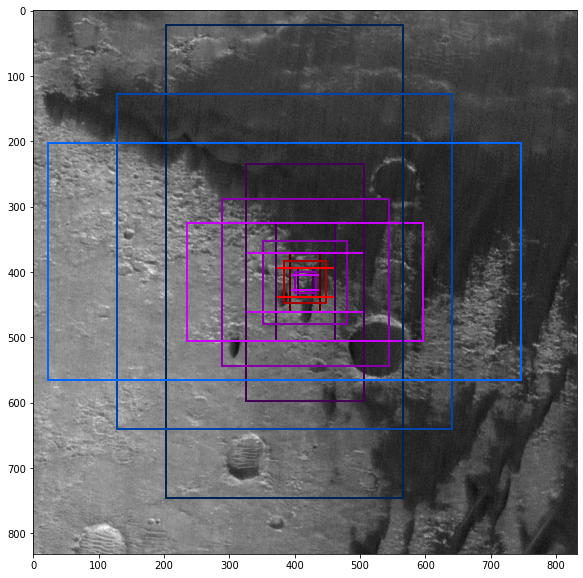

In [35]:
## Visualize anchors of one cell at the center of the feature map of a specific level

# Load and draw random image
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, _, _, _ = modellib.load_image_gt(dataset, config, image_id)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)
levels = len(config.BACKBONE_SHAPES)

for level in range(levels):
    colors = visualize.random_colors(levels)
    # Compute the index of the anchors at the center of the image
    level_start = sum(anchors_per_level[:level]) # sum of anchors of previous levels
    level_anchors = anchors[level_start:level_start+anchors_per_level[level]]
    print("Level {}. Anchors: {:6}  Feature map Shape: {}".format(level, level_anchors.shape[0], 
                                                                config.BACKBONE_SHAPES[level]))
    center_cell = config.BACKBONE_SHAPES[level] // 2
    center_cell_index = (center_cell[0] * config.BACKBONE_SHAPES[level][1] + center_cell[1])
    level_center = center_cell_index * anchors_per_cell 
    center_anchor = anchors_per_cell * (
        (center_cell[0] * config.BACKBONE_SHAPES[level][1] / config.RPN_ANCHOR_STRIDE**2) \
        + center_cell[1] / config.RPN_ANCHOR_STRIDE)
    level_center = int(center_anchor)

    # Draw anchors. Brightness show the order in the array, dark to bright.
    for i, rect in enumerate(level_anchors[level_center:level_center+anchors_per_cell]):
        y1, x1, y2, x2 = rect
        p = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, facecolor='none',
                              edgecolor=(i+1)*np.array(colors[level]) / anchors_per_cell)
        ax.add_patch(p)

## Data Generator


In [36]:
# Create data generator
random_rois = 2000

g = modellib.DataGenerator(dataset, config, shuffle=True, random_rois=random_rois, 
    batch_size=4,
    detection_targets=True)


# g = modellib.data_generator(
#     dataset, config, shuffle=True, random_rois=random_rois, 
#     batch_size=4,
#     detection_targets=True)

In [37]:
# Uncomment to run the generator through a lot of images
# to catch rare errors
# for i in range(1000):
#     print(i)
#     _, _ = next(g)

In [38]:
# Get Next Image
if random_rois:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_class_ids, gt_boxes, gt_masks, rpn_rois, rois], \
    [mrcnn_class_ids, mrcnn_bbox, mrcnn_mask] = next(g)
    
    log("rois", rois)
    log("mrcnn_class_ids", mrcnn_class_ids)
    log("mrcnn_bbox", mrcnn_bbox)
    log("mrcnn_mask", mrcnn_mask)
else:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_boxes, gt_masks], _ = next(g)
    
log("gt_class_ids", gt_class_ids)
log("gt_boxes", gt_boxes)
log("gt_masks", gt_masks)
log("rpn_match", rpn_match, )
log("rpn_bbox", rpn_bbox)
image_id = image_meta[0][0]
print("image_id: ", image_id, dataset.image_reference(image_id))

# Remove the last dim in mrcnn_class_ids. It's only added
# to satisfy Keras restriction on target shape.
mrcnn_class_ids = mrcnn_class_ids[:,:,0]

Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcjiv5g55di50ybcde8y6j0d.jpg
Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki7yerlz00113g68u4sx0fk9.jpg
Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki58gjmy00003g68hsr3d26k.jpg
Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcjvfoey04jn0ybch7tr0nb4.jpg
rois                     shape: (4, 200, 4)           min:    3.00000  max:  831.00000  int32
mrcnn_class_ids          shape: (4, 200, 1)           min:    0.00000  max:    2.00000  int32
mrcnn_bbox               shape: (4, 200, 3, 4)        min:   -2.90335  max:    2.85714  float32
mrcnn_mask               shape: (4, 200, 28, 28, 3)   min:    0.00000  max:    1.00000  float32
gt_class_ids             shape: (4, 100)              min:    0.00000  max:    2.00000  int32
gt_boxes                 shape: (4, 100, 4)           min:    0.00000  max:  8

anchors                  shape: (172887, 4)           min: -362.03867  max: 1130.03867  float64
refined_anchors          shape: (4, 4)                min:    0.00000  max:  735.00000  float32
Positive anchors: 4
Negative anchors: 252
Neutral anchors: 172631
BG                     : 178
TAR                    : 22


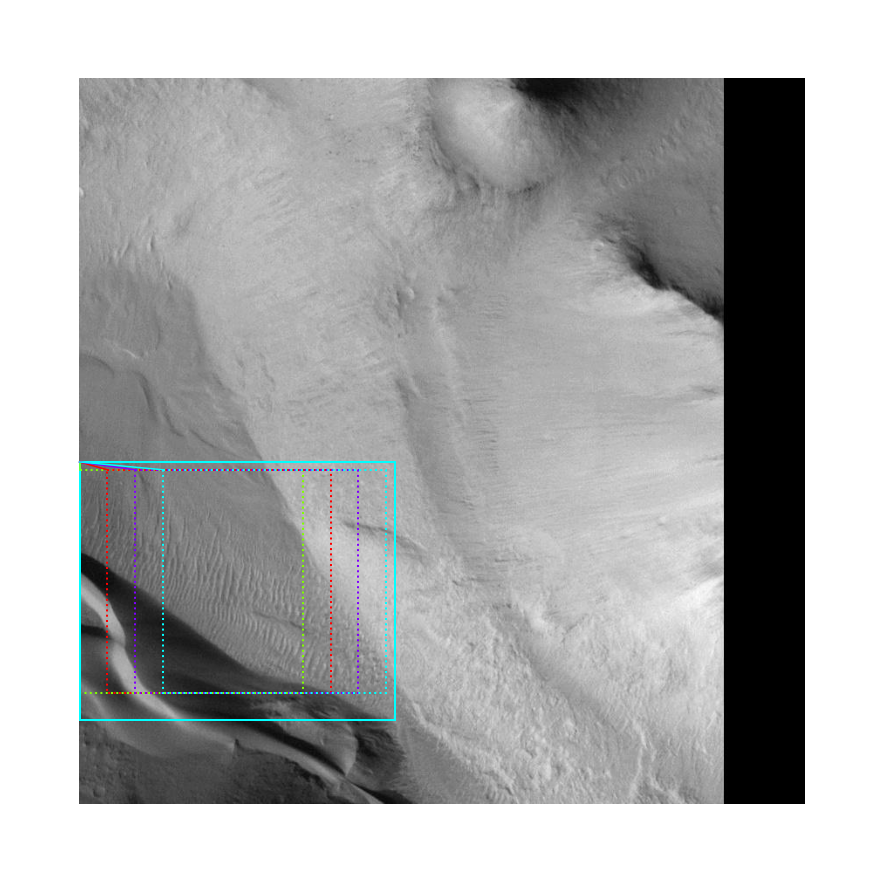

In [39]:
b = 0

# Restore original image (reverse normalization)
sample_image = modellib.unmold_image(normalized_images[b], config)

# Compute anchor shifts.
indices = np.where(rpn_match[b] == 1)[0]
refined_anchors = utils.apply_box_deltas(anchors[indices], rpn_bbox[b, :len(indices)] * config.RPN_BBOX_STD_DEV)
log("anchors", anchors)
log("refined_anchors", refined_anchors)

# Get list of positive anchors
positive_anchor_ids = np.where(rpn_match[b] == 1)[0]
print("Positive anchors: {}".format(len(positive_anchor_ids)))
negative_anchor_ids = np.where(rpn_match[b] == -1)[0]
print("Negative anchors: {}".format(len(negative_anchor_ids)))
neutral_anchor_ids = np.where(rpn_match[b] == 0)[0]
print("Neutral anchors: {}".format(len(neutral_anchor_ids)))

# ROI breakdown by class
for c, n in zip(dataset.class_names, np.bincount(mrcnn_class_ids[b].flatten())):
    if n:
        print("{:23}: {}".format(c[:20], n))

# Show positive anchors
fig, ax = plt.subplots(1, figsize=(16, 16))
visualize.draw_boxes(sample_image, boxes=anchors[positive_anchor_ids], 
                     refined_boxes=refined_anchors, ax=ax)

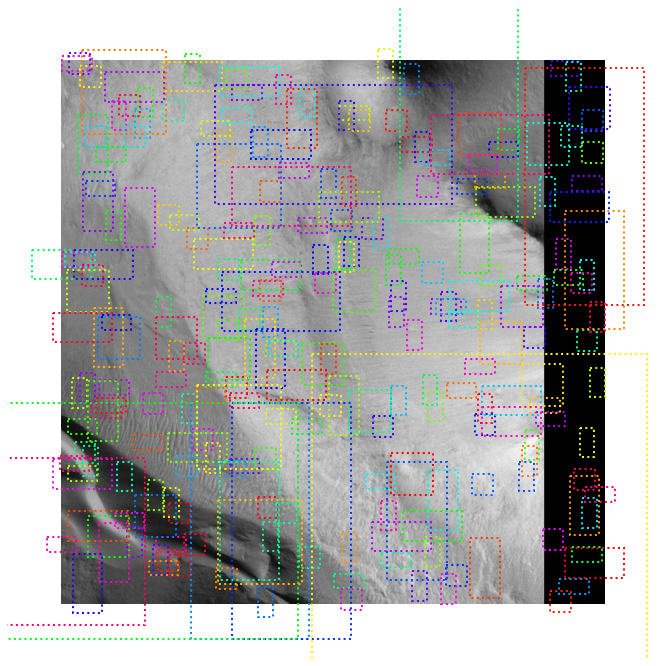

In [40]:
# Show negative anchors
visualize.draw_boxes(sample_image, boxes=anchors[negative_anchor_ids])

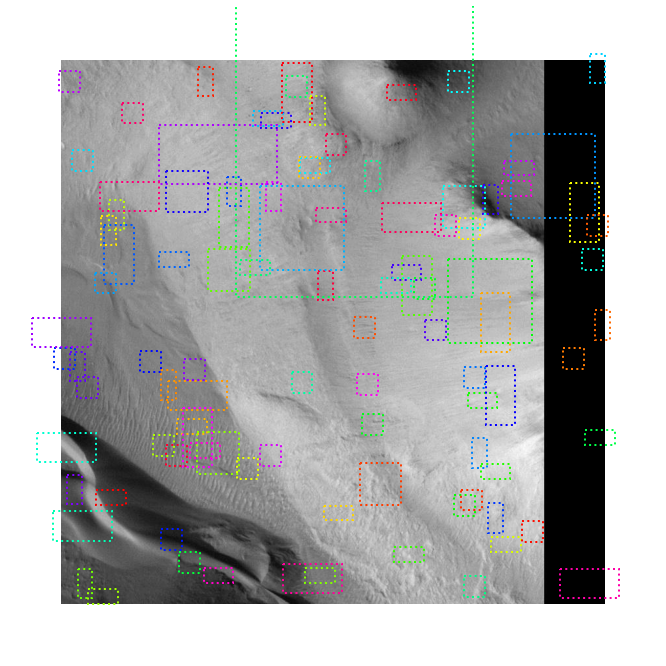

In [41]:
# Show neutral anchors. They don't contribute to training.
visualize.draw_boxes(sample_image, boxes=anchors[np.random.choice(neutral_anchor_ids, 100)])

Positive ROIs:  22
Negative ROIs:  178
Positive Ratio: 0.11
Unique ROIs: 200 out of 200


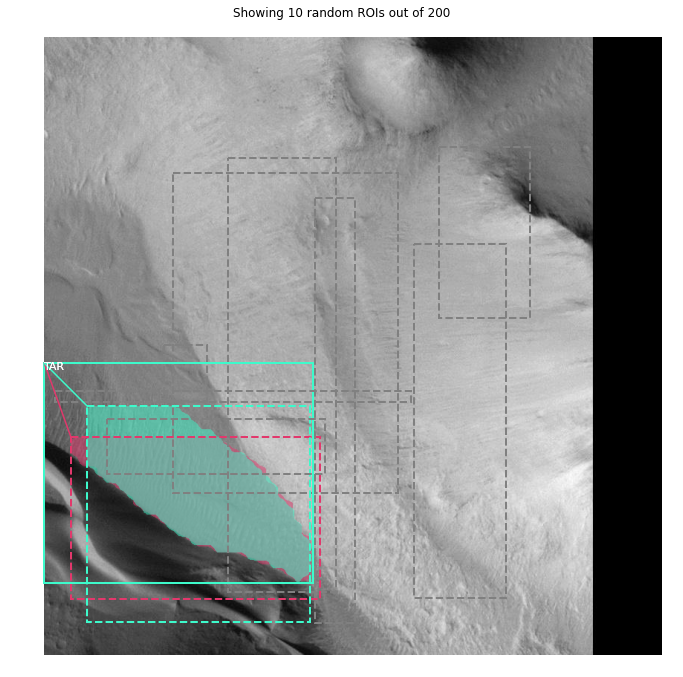

In [42]:
if random_rois:
    # Class aware bboxes
    bbox_specific = mrcnn_bbox[b, np.arange(mrcnn_bbox.shape[1]), mrcnn_class_ids[b], :]

    # Refined ROIs
    refined_rois = utils.apply_box_deltas(rois[b].astype(np.float32), bbox_specific[:,:4] * config.BBOX_STD_DEV)

    # Class aware masks
    mask_specific = mrcnn_mask[b, np.arange(mrcnn_mask.shape[1]), :, :, mrcnn_class_ids[b]]

    visualize.draw_rois(sample_image, rois[b], refined_rois, mask_specific, mrcnn_class_ids[b], dataset.class_names)
    
    # Any repeated ROIs?
    rows = np.ascontiguousarray(rois[b]).view(np.dtype((np.void, rois.dtype.itemsize * rois.shape[-1])))
    _, idx = np.unique(rows, return_index=True)
    print("Unique ROIs: {} out of {}".format(len(idx), rois.shape[1]))

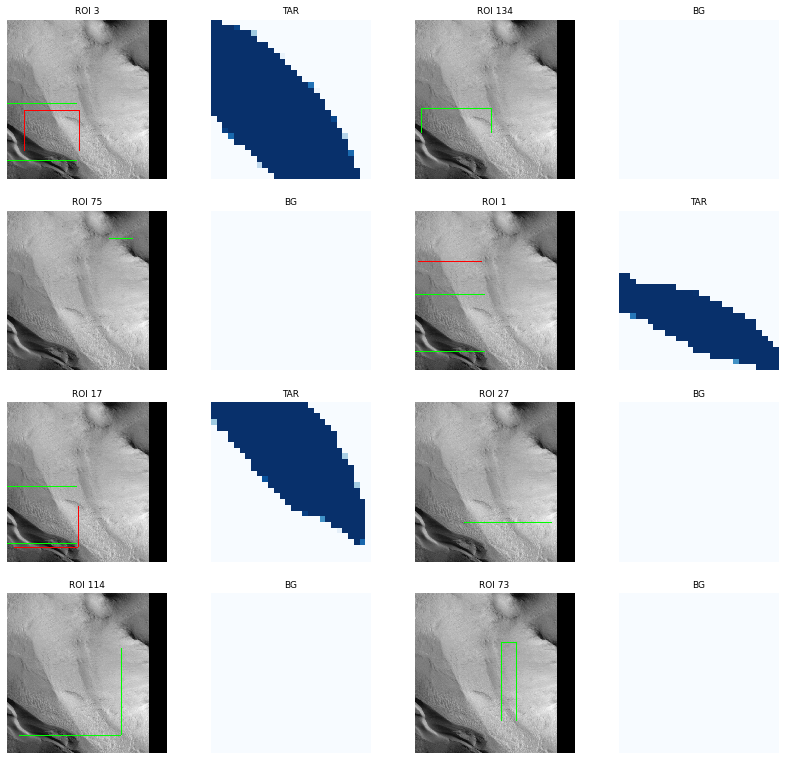

In [43]:
if random_rois:
    # Dispalay ROIs and corresponding masks and bounding boxes
    ids = random.sample(range(rois.shape[1]), 8)

    images = []
    titles = []
    for i in ids:
        image = visualize.draw_box(sample_image.copy(), rois[b,i,:4].astype(np.int32), [255, 0, 0])
        image = visualize.draw_box(image, refined_rois[i].astype(np.int64), [0, 255, 0])
        images.append(image)
        titles.append("ROI {}".format(i))
        images.append(mask_specific[i] * 255)
        titles.append(dataset.class_names[mrcnn_class_ids[b,i]][:20])

    display_images(images, titles, cols=4, cmap="Blues", interpolation="none")

In [44]:
# Check ratio of positive ROIs in a set of images.
if random_rois:
    limit = 10
    temp_g = modellib.DataGenerator(
        dataset, config, shuffle=True, random_rois=10000, 
        batch_size=1, detection_targets=True)
    total = 0
    for i in range(limit):
        _, [ids, _, _] = next(temp_g)
        positive_rois = np.sum(ids[0] > 0)
        total += positive_rois
        print("{:5} {:5.2f}".format(positive_rois, positive_rois/ids.shape[1]))
    print("Average percent: {:.2f}".format(total/(limit*ids.shape[1])))

Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcjiv5g55di50ybcde8y6j0d.jpg
   66  0.33
Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki7yerlz00113g68u4sx0fk9.jpg
   66  0.33
Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/cki58gjmy00003g68hsr3d26k.jpg
   66  0.33
Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcjvfoey04jn0ybch7tr0nb4.jpg
   66  0.33
Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcy524bw000s3a60sh60mha2.jpg
   66  0.33
Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckdae71z500003b5sw9fc7xam.jpg
   66  0.33
Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckcigbc4000du0y8thgpy6si5.jpg
   66  0.33
Loading masks for image /home/liorr/Mask_RCNN/mrcnn/aeolian_dataset/dataset/train/ckd2e4v4y00023a60mg4bu4qe.jpg
   66  0.33
Loading 